In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import pickle
import json
import re

%matplotlib inline

In [2]:
with open('../../assets/all_books.pkl', 'rb') as f:
    all_books = pickle.load(f)

df = pd.DataFrame(all_books)
df.head()

## Let's look at some graphs comparing the different schools

In [79]:
category_list = [134,135,136,137]

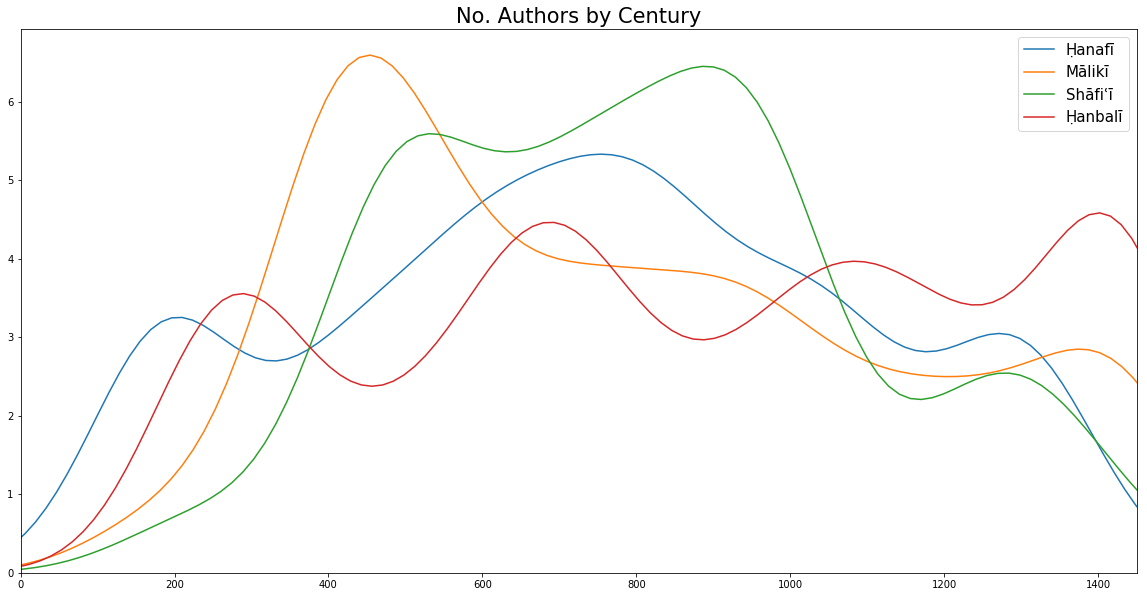

In [50]:
f,ax = plt.subplots(figsize=(20,10))

sns.kdeplot(df[df['category_id'] == 134]['author_dd'], bw=95, label="Ḥanafī", ax=ax);
sns.kdeplot(df[df['category_id'] == 135]['author_dd'], bw=95, label="Mālikī", ax=ax);
sns.kdeplot(df[df['category_id'] == 136]['author_dd'], bw=95, label="Shāfiʿī", ax=ax);
sns.kdeplot(df[df['category_id'] == 137]['author_dd'], bw=95, label="Ḥanbalī", ax=ax);

ax.set(xlim=(0, 1450));
ax.set_yticklabels(['0','1','2','3','4','5','6','7'])
ax.legend(fontsize=15)
ax.set_title("No. Authors by Century", fontsize=21);

In [111]:
def plot_for_authors(category, feature, kind, title):
    df[df['category_id'] == category].groupby(['author_dd'])[feature].sum().plot(kind=kind, figsize=(20,10), title=title, legend=True);

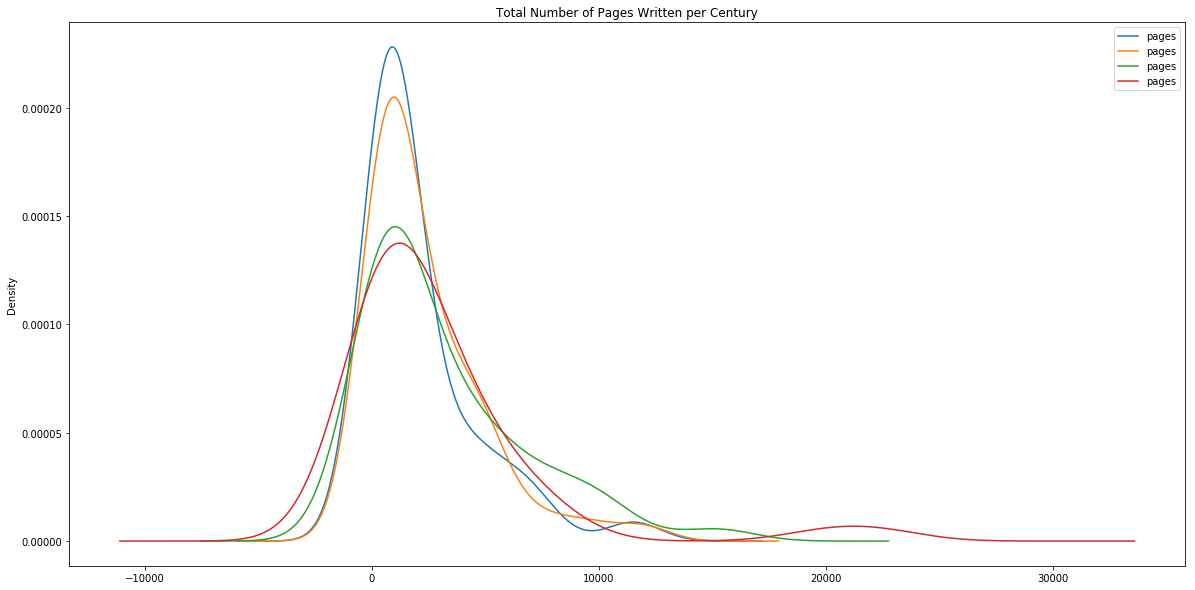

In [115]:
for category in category_list:
    plot_for_authors(category, 'pages','kde','Total Number of Pages Written per Century')

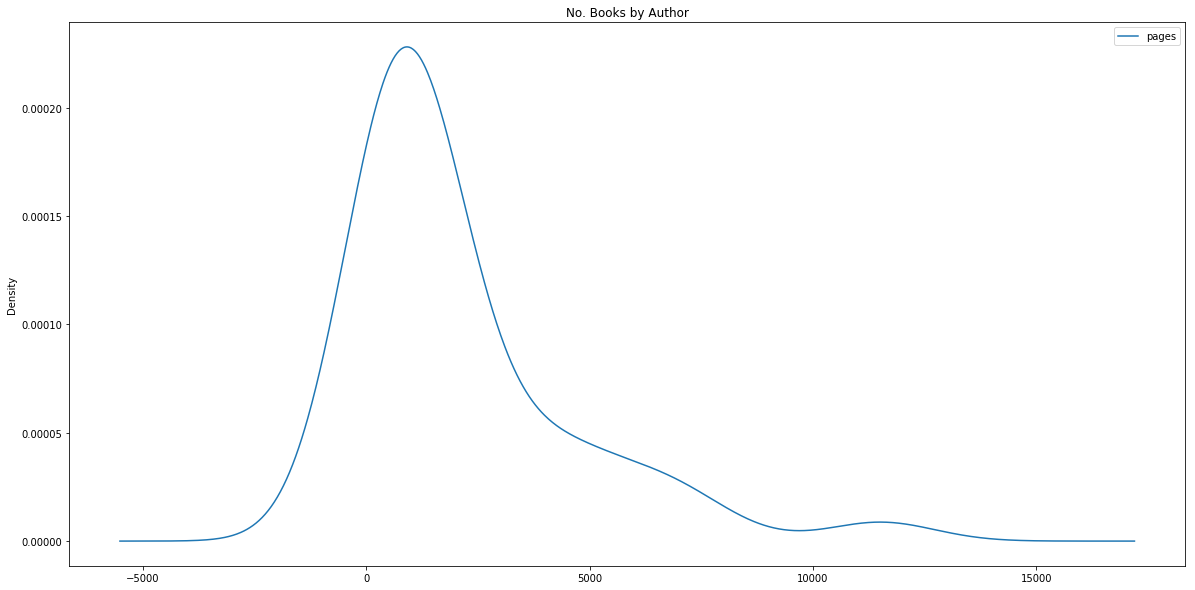

In [114]:
    df[df['category_id'] == 134].groupby(['author_dd'])['pages'].sum().plot(kind='kde', figsize=(20,10), title=title, legend=True);

In [98]:
df[df['category_id'] == 134].groupby(['author_dd']).filter(lambda x: x['book_id'].count() > 1)

,author_dd,author_id,author_name,book_id,category_id,pages,text
4,593,1454,المَرْغِيناني,11820,134,1237,"\nالمجلد الأولمقدمة..."" من يرد الله به خيرا ي..."
6,1069,1265,الشرنبلالي,12117,134,183,\nظƒطھط§ط¨ ط§ظ„ط·ظ‡ط§ط±ط©[ط§ظ„ظ…ظٹط§ظ‡]1 -[ط§...
8,428,2667,القدوري,124336,134,239,\n\t\t\t\tبسم الله الرحمن الرحيم1 - كتاب الطه...
10,855,71,بدر الدين العيني,13784,134,463,\n\t\t\t\tط¨ط³ظ… ط§ظ„ظ„ظ‡ ط§ظ„ط±ط­ظ…ظ† ط§ظ„ط±...
13,189,277,محمد بن الحسن الشيباني,14285,134,6784,\n\t\t\t\tط§ظ„ط£ظژطµظ’ظ„ظڈظ„ظ„ط¥ظگظ…ظژط§ظ…ظگ ...
15,1306,2683,محمد قدري باشا,14450,134,156,\n\t\t\t\tكتابمرشد الحيران إلى معرفة أحوال ال...
17,428,2667,القدوري,17768,134,6324,\n\t\t\t\tظ…ظˆط³ظˆط¹ط© ط§ظ„ظ‚ظˆط§ط¹ط¯ ط§ظ„ظپظ...
19,189,277,محمد بن الحسن الشيباني,18264,134,136,\n\t\t\t\tط¨ط³ظ… ط§ظ„ظ„ظ‡ ط§ظ„ط±ط­ظ…ظ† ط§ظ„ط±...
27,1069,1265,الشرنبلالي,412,134,343,\nظƒطھط§ط¨ ط§ظ„ط·ظ‡ط§ط±ط©ط¨ط§ط¨ ظپظٹ ط§ظ„ظ…ظٹ...
28,855,71,بدر الدين العيني,427,134,7019,\n[مقدمة الكتاب]بِسْمِ اللَّهِ الرَّحْمَنِ ال...


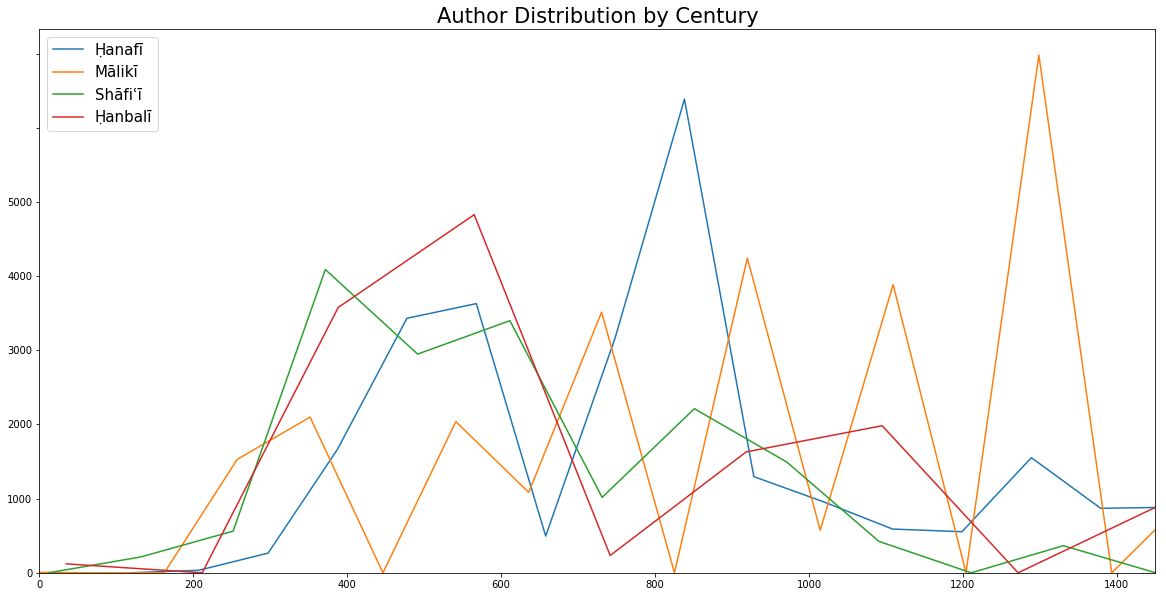

In [75]:
f,ax = plt.subplots(figsize=(20,10))

sns.kdeplot(df[df['category_id'] == 134].groupby('author_dd')['pages'].sum(), bw=15, label="Ḥanafī", ax=ax);
sns.kdeplot(df[df['category_id'] == 135].groupby('author_dd')['pages'].sum(), bw=15, label="Mālikī", ax=ax);
sns.kdeplot(df[df['category_id'] == 136].groupby('author_dd')['pages'].sum(), bw=15, label="Shāfiʿī", ax=ax);
sns.kdeplot(df[df['category_id'] == 137].groupby('author_dd')['pages'].sum(), bw=15, label="Ḥanbalī", ax=ax);

ax.set(xlim=(0, 1450));
ax.set_yticklabels(['0','1000','2000','3000','4000','5000'])
ax.legend(fontsize=15)
ax.set_title("Author Distribution by Century", fontsize=21);

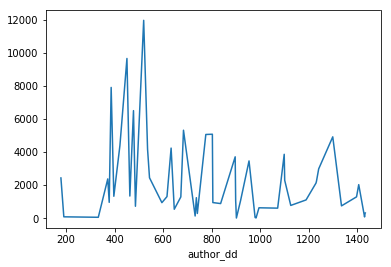

In [78]:
df[df['category_id'] == 135].groupby('author_dd')['pages'].sum().plot()

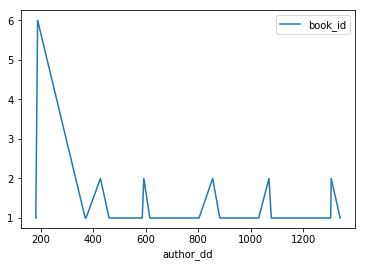

In [70]:
df[df['category_id'] == 134].groupby('author_dd')[['book_id']].count().plot()

In [55]:
df[df['category_id'] == 137].groupby('author_dd')['pages'].sum()

author_dd
241      6858
251      4239
275       451
280      2497
311       586
317        83
334       240
428       548
458      2443
510       637
526        80
620      8057
624       682
652      1085
682     22428
695      3091
728      3279
749       467
763      5540
772      4333
884      4137
885     20031
968      2574
972      2482
1033      437
1051     7019
1083      187
1088     3861
1097     2547
1135      983
1189      529
1192      893
1206      890
1243     4464
1319      514
1353     1165
1376      394
1389      238
1392     4103
1421     6754
1422     2862
1423     1076
1425       97
1428     1484
1430      424
1432      424
1436      471
1437      588
Name: pages, dtype: int64

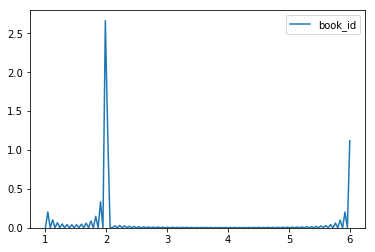

In [56]:
sns.kdeplot(df[df['category_id'] == 134].groupby('author_dd')['book_id'].count(), legend=True)

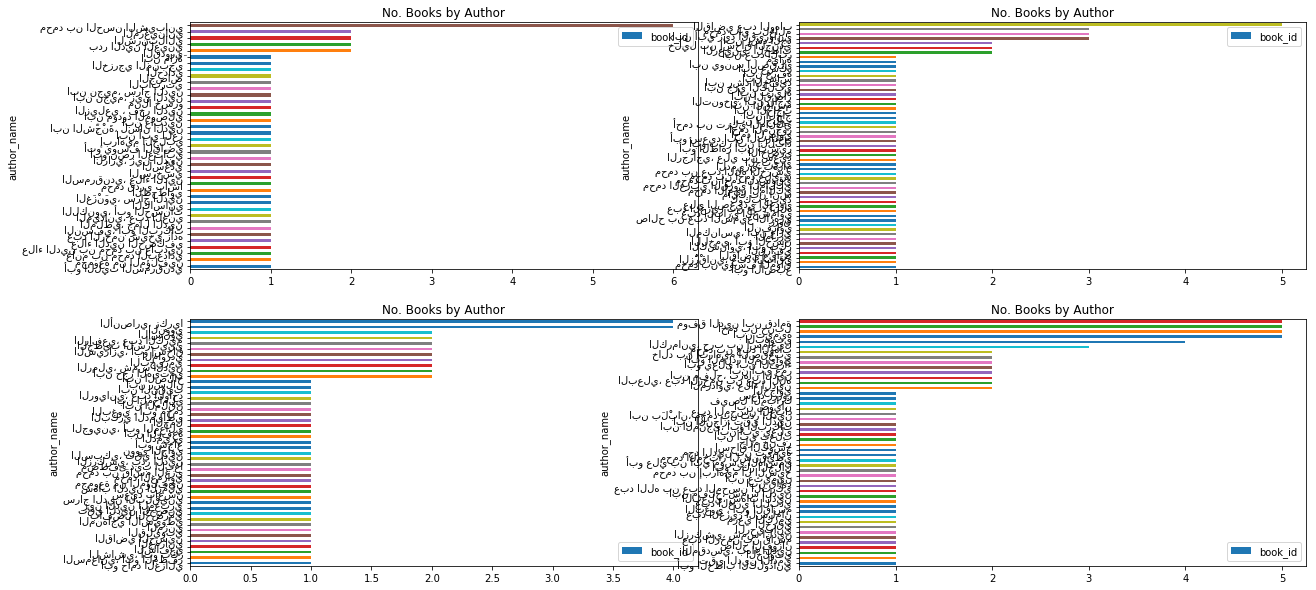

In [27]:
f,axes = plt.subplots(2,2,figsize=(20,10))

kind = 'barh'
title = 'No. Books by Author'
for ax,category in zip(axes.flatten(),[134,135,136,137]):
    df[df['category_id'] == category].groupby(['author_name'])['book_id'].count().sort_values().plot(kind=kind, figsize=(20,10), title=title, legend=True, ax=ax);

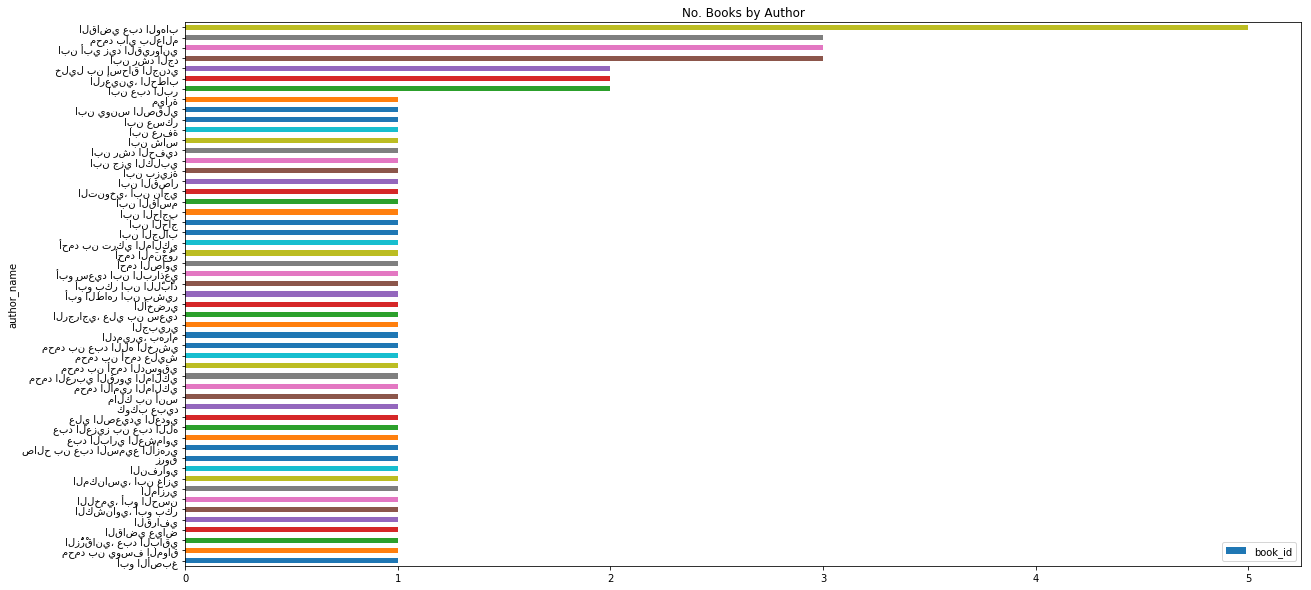

In [21]:
plot_for_authors(135, 'bookid', 'barh', 'No. Books by Author')